# Trabajo Práctico 1: Análisis Exploratorio de Datos- Machine Learning

## Integrantes: Cravero, Ulises y Pautasso, L. Nicolás.
## Tema: CS:GO Professional Matches.

### Introducción:
#### Counter-Strike Global Offensive es un juego lanzado en 2012, como secuela de Counter-Strike Source (lanzado en 2004), que es a su vez una secuela del Counter-Strike original (lanzado en 2000). La longevidad del juego se debe principalmente a su enfoque competitivo y su escena profesional en constante crecimiento.
#### Esta longevidad se ha mostrado en números recientemente, ya que CS:GO alcanzó en marzo 2020 su máximo histórico de jugadores simultáneos (1,1 millones de jugadores), lo que lo convirtió en el juego más jugado en la plataforma Steam, 8 años después de su lanzamiento.

### Dataset utilizado: 
#### El dataset utilizado corresponde a las estadisticas finales de los partidos de jugadores profesionales en lo que respecta a competiciones oficiales desde noviembre 2015 hasta marzo 2020.

### Variable a predecir:
#### La variable a predecir es la variable 'kddiff', clasificándola en positiva o negativa al finalizar la partida (el mejor de tres mapas). El momento en que se realiza esto es al haber finalizado el primero de los mapas.

### Importamos las librerias necesarias


In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Importamos el CSV y mostramos su tamaño y todas sus columnas

In [28]:
# Se realizó un tratamiento de la información disponible y se eliminaron registros que no eran útiles en pos de decrementar el tamaño final en memoria del dataset
# Para esto se utilizaron las siguientes lineas:

# players = players[players["best_of"] != 1]

In [30]:
pd.options.display.max_columns = None
players = pd.read_csv('players_mejor_3.csv')

In [31]:
# Cantidad de registros y columnas del dataset original
players.shape


(383317, 101)

In [4]:
# Muestra aleatoria
players.sample(3)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
5997,2020-01-29,ADK,ROCK CANDY,Esper,Australia,17390,2339134,5152,ESEA MDL Season 33 Australia,1,Mirage,NaN,NaN,16,5,17,6,1.0,76.0,-1,71.1,-5,1.04,16,5,17,6,1.0,76.0,-1,71.1,-5,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,-2.0,66.3,60.0,0.83,10.0,9.0,1.0,74.3,86.7,1.19,6.0,8.0,-2.0,66.3,60.0,0.83,10.0,9.0,1.0,74.3,86.7,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192069,2018-02-07,MINISE,PRIDE,forZe,Poland,2826,2319135,3540,Hellcase Cup 7,1,Train,NaN,NaN,11,2,12,4,0.0,70.8,-1,54.9,-1,1.02,11,2,12,4,0.0,70.8,-1,54.9,-1,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,1.0,58.6,55.6,0.88,6.0,8.0,-2.0,52.7,80.0,1.10,5.0,4.0,1.0,58.6,55.6,0.88,6.0,8.0,-2.0,52.7,80.0,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113385,2018-10-16,Magisk,Astralis,G2,Denmark,9032,2327982,4071,ECS Season 6 Europe,1,Mirage,NaN,NaN,19,3,5,9,0.0,88.9,14,100.3,3,1.74,19,3,5,9,0.0,88.9,14,100.3,3,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,12.0,93.1,93.3,1.67,4.0,2.0,2.0,136.7,66.7,2.09,15.0,3.0,12.0,93.1,93.3,1.67,4.0,2.0,2.0,136.7,66.7,2.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpiamos las columnas que no necesitamos:

* Las columnas kills, assists, deaths, hs, flash_assists, kast, adr, fkdiff, rating, kills_ct, deaths_ct, kddiff_ct, adr_ct, kast_ct, rating_ct, kills_t, deaths_t, kddiff_t, adr_t, kast_t, rating_t se eliminan por que son variables producto de la suma de las desagregadas por mapa y nosotros trabajamos por mapa completo.

* Las columnas mX_kills y mX_deaths se eliminan porque son los dos valores que se utilizan para calcular nuestra variable de salida (mX_kills - mX_deaths). (No la eliminamos ahora porque nos sirve para graficar luego)

* La columna date, correspondiente al dia en el que se jugó la partida, no influye en el rendimiento de los jugadores en ella.

* La columna player_name, correspondiente al nombre del jugador, no influye en el rendimiento del mismo en la partida.

* La columna player_id, match_id, event_id son identificadores los cuales no aportan ninguna información ni medida de relación respecto a algo entre un registro y otro



In [5]:
players.drop(columns=['date', 'player_id', 'match_id', 'event_id', 'kills', 'assists', 'deaths', 'hs', 'flash_assists', 'kast', 'adr', 'fkdiff', 'rating', 'kills_ct', 'deaths_ct', 'kddiff_ct', 'adr_ct', 'kast_ct', 'rating_ct', 'kills_t', 'deaths_t', 'kddiff_t', 'adr_t', 'kast_t', 'rating_t'],axis=1,inplace=True)


In [6]:
# Volvemos a obtener una muestra
players.sample(3)

,player_name,team,opponent,country,event_name,best_of,map_1,map_2,map_3,kddiff,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
47781,KSCERATO,FURIA,Renegades,Brazil,ESL One Cologne 2019,3,Nuke,Mirage,NaN,21,19,8,13,10,3.0,88.0,6,72.6,0,1.33,28.0,3.0,13.0,17.0,1.0,78.6,15.0,98.5,0.0,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,9.0,85.2,100.0,1.88,8.0,11.0,-3.0,64.1,80.0,0.97,13.0,6.0,7.0,85.6,80.0,1.39,15.0,7.0,8.0,113.4,76.9,1.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106488,hampus,Red Reserve,Flow,Sweden,ESEA MDL Season 29 Europe,1,Cache,NaN,NaN,-4,16,10,20,4,2.0,69.0,-4,68.8,-1,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.0,1.0,81.6,57.1,0.94,6.0,11.0,-5.0,56.9,80.0,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352801,ImpressioN,dream[S]cape,xqR,Singapore,WCA 2016 Asia-Pacific Qualifier,3,Train,Inferno,NaN,16,24,8,14,11,NaN,85.7,10,143.8,1,1.91,20.0,3.0,14.0,11.0,NaN,76.2,6.0,99.3,-1.0,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Columnas del dataset:

#### VARIABLES DE ENTRADA:
 * team: equipo al que pertenece el jugador. Es una variable tipo string. Se utiliza.
 * opponent: equipo contrario de la partida. Es una variable tipo string. Se utiliza.
 * country: pais de procedencia del jugador. Es una varaible tipo string. Se utiliza.
 * best_of: número máximo de mapas que determinarán el equipo vencedor. Quien gane más mapas, gana. Es una variable de tipo entero, que toma el valor 1 o 3 (los registros con valor 1 serán eliminados para el analisis del presente trabajo).
 * map_X (X = 1,2,3): número de mapa dentro de la partida, siendo x = 1 el primero y x = 3 el último. Es una variable de tipo entero. Se utiliza.
 * mX_kills (X = 1,2,3): número de muertes provocadas por el jugador en el mapa correspondiente. Es una variable de tipo entero positivo.
 * mX_assists (X = 1,2,3): número de asistencias (ayuda a la muerte de un oponente, siendo otro quien lo mata) del jugador en el mapa correspondiente. Es una variable de tipo entero positivo. Se utiliza.
 * mX_deaths (X = 1,2,3): número de muertes sufridas por el jugador en el mapa correspondiente. Es una variable de tipo entero.
 * mX_hs (X = 1,2,3): número de disparos a la cabeza del oponente en el mapa correspondiente. Es una variable de tipo entero. Se utiliza.
 * mX_flash_assists: número de asistencias a un compañero con granada cegadora para matar a un oponente en el mapa correspondiente. Es una variable de tipo entero.
 * mX_kast (X = 1,2,3): porcentaje de rondas en el mapa correspondiente en el que el jugador mató, asistió, sobrevivió o se tiroteó con un oponente (en %). Es una variable tipo flotante, que representa un porcentaje. Se utiliza.
 * mX_kddiff (X = 1,2,3): diferencia entre muertes provocadas por el jugador y muertes propias en el mapa correspondiente. Es una variable tipo entero. Se utiliza.
 * mX_adr (X = 1,2,3): daño medio por ronda provocado por el jugador en el mapa correspondiente (en %). Es una variable tipo flotante, que representa un porcentaje. Se utiliza.
 * mX_fkdiff (X = 1,2,3): sumatoria de veces que el jugador hace la primer muerte o es asesinado en el mapa correspondiente (muerte provocada suma 1, muerte propia resta 1). Es una variable de tipo entero. Se utiliza.
 * mX_rating (X = 1,2,3): llamado 'Rating 2.0', es un cálculo que se obtiene de múltiples estadísticas (alrededor de 10), en la cual se toma el promedio para esas estadísticas (promedio de muertes provocadas, promedio de rondas sobrevividas, promedio de kast, promedio de daño provocado y promedio de impact (formula en base a fkdiff, clutches ganados, multiples muertes en una misma ronda, etc)) y verifica cuánto por encima o por debajo de ese valor esperado está un determinado jugador en el mapa correspondiente. Es una variable tipo flotante, que representa un porcentaje. Se utiliza.
 
#### VARIABLE DE SALIDA:
 * kddiff: diferencia entre muertes provocadas por el jugador y muertes propias al finalizar la partida. Es un número entero, cuyo valor minimo puede ser igual a las muertes propias (en negativo, si no mato ningun oponente) y su máximo igual las muertes provocadas (si no fue nunca asesinado por un adversario). Queremos conocer si el jugador terminará la partida con un kddiff positivo o negativo.

### Balanceo de la variable de salida (kddiff) y consecuencias a la hora de entrenar y medir el rendimiento de distintos modelos.


Número de registros con KD Diff >= 0: 99170
Número de registros con KD Diff < 0: 98893


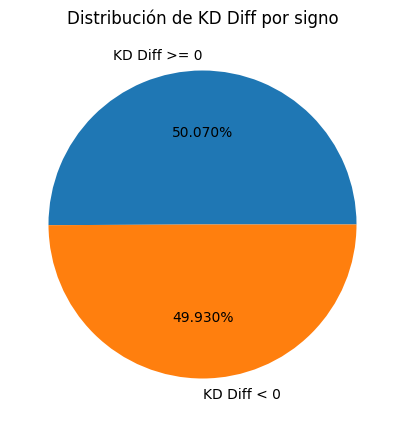

In [9]:
# Obtenemos la cantidad de valores mayores y menores que 0
kddiff_pos = (players['kddiff'] >= 0).sum()
kddiff_neg = (players['kddiff'] < 0).sum()

print(f'Número de registros con KD Diff >= 0: {kddiff_pos}')
print(f'Número de registros con KD Diff < 0: {kddiff_neg}')

# Creamos un gráfico de torta de la distribución de los valores positivos y negativos de kddiff, mostrando los porcentajes con tres decimales (por el gran balanceo que existe)
plt.figure(figsize=(5, 5))
plt.pie([kddiff_pos, kddiff_neg], labels=['KD Diff >= 0', 'KD Diff < 0'], autopct='%1.3f%%')
plt.title('Distribución de KD Diff por signo')

plt.show()


* Como se puede ver en el gráfico anterior, la variable de salida kddiff tiene una cantidad similar de ejemplos en cada categoria (positivo o negativo), por lo cual se encuentra muy bien balanceada. 
* Esto nos hace pensar que, sumado a la gran cantidad de registros del dataset, los modelos no estarán sesgados hacia ninguna de las dos clasificaciones, lo que significa que podría ser capaz de clasificar correctamente casos de ambas categorías por igual.

### Gráficos, comportamiento y afectación a la variable de salida de 5 variables de entrada:



#### VARIABLES DE ENTRADA:
 * m1_kills (se descarta)
 * m1_assists
 * m1_deaths (se descarta)
 * m1_hs
 * m1_fkdiff
 * country 
 
##### Eleccion de variables:
Las variables de entrada que podrían afectar a la de salida (por la naturaleza misma de ésta) son aquellas que están relacionadas con la capacidad de daño y supervivencia del jugador.

Descartamos las variables relacionadas a provocar muertes (m1_kills) y veces que murió (m1_deaths) ya que creemos que la variable de salida se deduce directamente de la relación entre estas dos (m1_kills - m1_deaths) por lo que pierde sentido utilizarlas en el modelo.

En lo que respecta a las demás variables representadas, tenemos la variable que representa la capacidad de realizar asistencias (partidas en las que casi mata a algún oponente y este luego es rematado por un compañero de equipo)(m1_assists), la cantidad total de disparos a la cabeza del oponente en el mapa (siendo que son estos disparos los que mas daño provocan, aumentando la probabilidad de que se realice una baja con ellos)(m1_hs), el conteo de primeras muertes realizadas menos primer muerte sufrida (m1_fkdiff)  y el pais de origen del jugador (country), ya que pensamos que puede influir en el sentido que existen paises con mayor infraestructura y tradición en e-Sports que otros.

Con respecto a como se presenta la información y el rango de valores que toma cada variable, pensamos que a las tres primeras elegidas las podríamos someter a un proceso de escalado, convirtiéndolas a valores en otro rango sin cambiar su distribución (min-max normalization entre 0 y 1, por ejemplo).
Con respecto a la última variable elegida (country) podríamos utilizar un One-Hot encoder, en la que representemos si es o no de tal pais, ya que como se encuentran representados al momento, los nombres de estos no nos aportan información uno respecto al otro.


<Axes: title={'center': 'Conteo de primeras muertes provocadas vs primeras muertes propias en el mapa'}, xlabel='Conteo de fkdiff'>

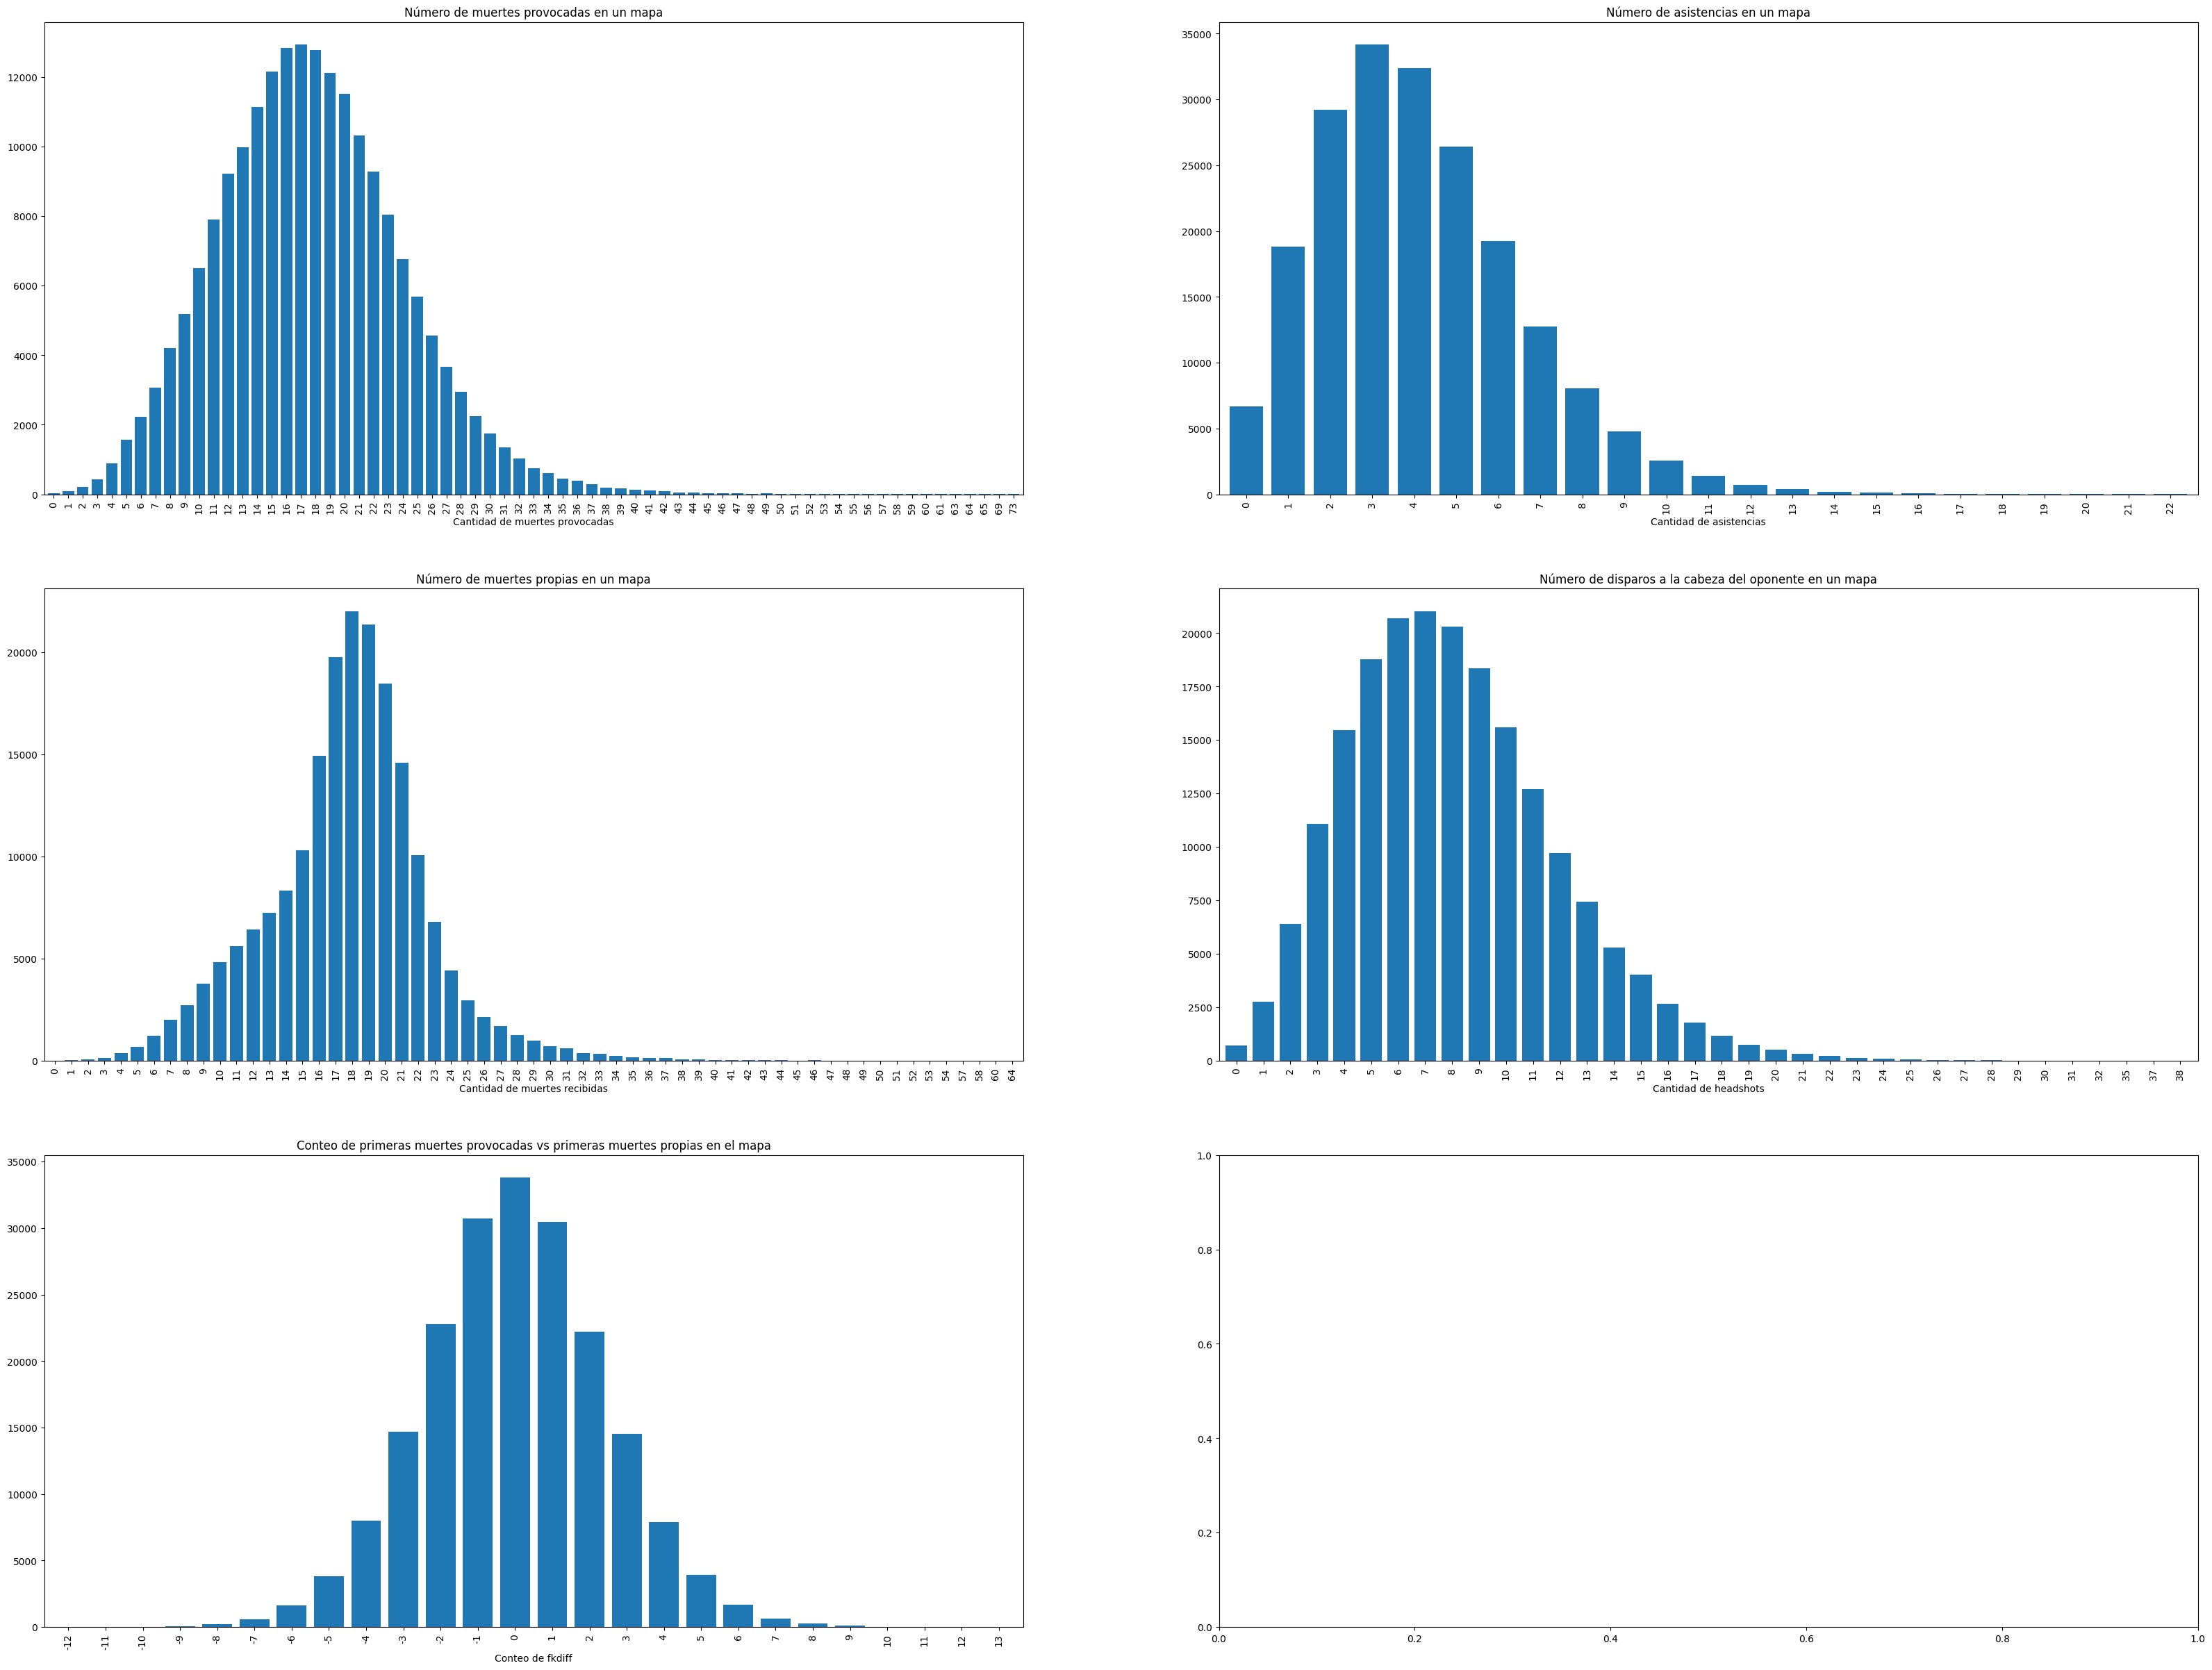

In [10]:
# Gráficos de las 5 primeras variables:
f, ax = plt.subplots(3, 2, figsize=(40, 30))

# m1_kills:
players.m1_kills.value_counts().sort_index().plot.bar(ax=ax[0,0], width=0.8, xlabel='Cantidad de muertes provocadas', title='Número de muertes provocadas en un mapa')
# m1_assists:
players.m1_assists.value_counts().sort_index().plot.bar(ax=ax[0,1], width=0.8, xlabel='Cantidad de asistencias', title='Número de asistencias en un mapa')
# m1_deaths:
players.m1_deaths.value_counts().sort_index().plot.bar(ax=ax[1,0], width=0.8, xlabel='Cantidad de muertes recibidas', title='Número de muertes propias en un mapa')
# m1_hs:
players.m1_hs.value_counts().sort_index().plot.bar(ax=ax[1,1], width=0.8, xlabel='Cantidad de headshots', title='Número de disparos a la cabeza del oponente en un mapa')
# m1_fkdiff:
players.m1_fkdiff.value_counts().sort_index().plot.bar(ax=ax[2,0], width=0.8, xlabel='Conteo de fkdiff', title='Conteo de primeras muertes provocadas vs primeras muertes propias en el mapa')

<Axes: title={'center': 'Pais de procedencia del jugador'}, xlabel='Cantidad de jugadores', ylabel='Pais de procedencia'>

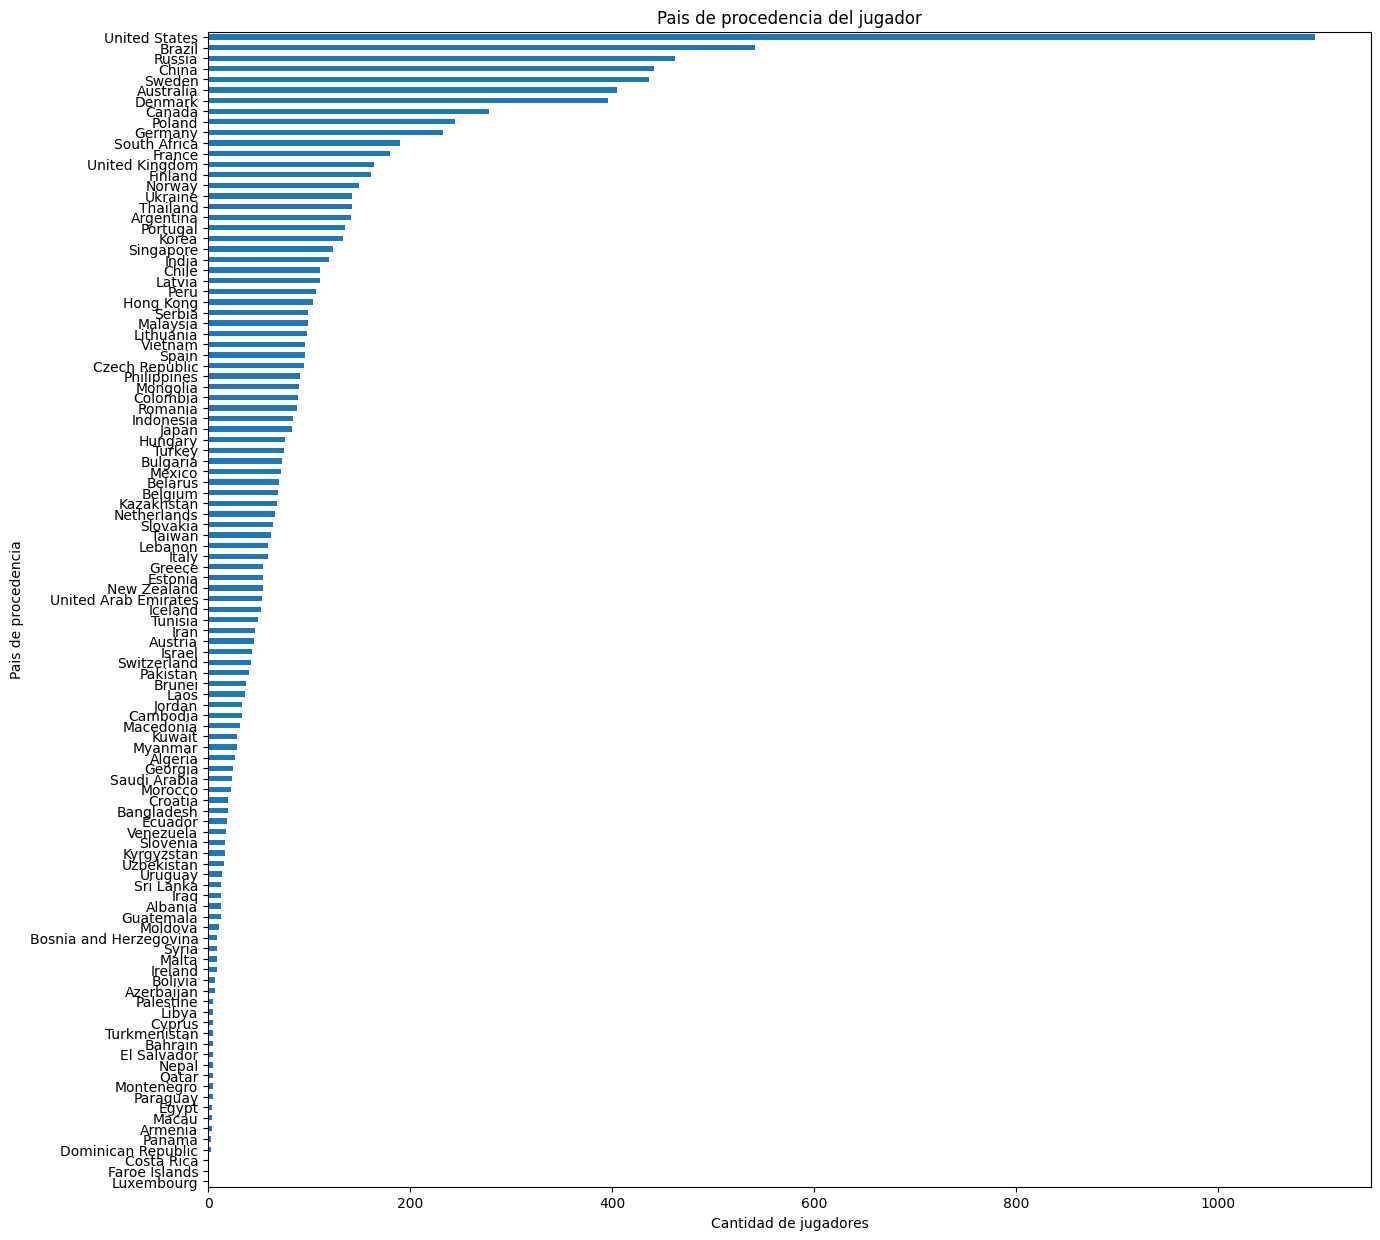

In [11]:
# Gráfico variable country:

# Agrupamos a los jugadores repetidos para quedarnos con el pais de cada uno.
players.groupby('country')['player_name'].nunique().sort_values().plot.barh(figsize=(15, 15), ylabel='Pais de procedencia', xlabel='Cantidad de jugadores', title='Pais de procedencia del jugador')

### Analisis de valores extremos y/o nulos de las variables de entrada:

In [12]:
# Analisis de valores extremos en las variables:

# m1_kills:
print("m1_kills:\n", players.m1_kills.describe().round(2))
# m1_deaths:
print("\nm1_deaths:\n", players.m1_deaths.describe().round(2))
# m1_assists:
print("\nm1_assists:\n", players.m1_assists.describe().round(2))
# m1_hs:
print("\nm1_hs:\n", players.m1_hs.describe().round(2))
# m1_fkdiff:
print("\nm1_fkdiff:\n", players.m1_fkdiff.describe().round(2))

# Análisis de variable country, de tipo string
print("\nValores únicos en la variable 'country':\n", players.country.value_counts())

m1_kills:
 count    198063.00
mean         17.69
std           6.36
min           0.00
25%          13.00
50%          17.00
75%          22.00
max          73.00
Name: m1_kills, dtype: float64

m1_deaths:
 count    198063.00
mean         17.71
std           4.84
min           0.00
25%          15.00
50%          18.00
75%          20.00
max          64.00
Name: m1_deaths, dtype: float64

m1_assists:
 count    198063.00
mean          4.12
std           2.45
min           0.00
25%           2.00
50%           4.00
75%           6.00
max          22.00
Name: m1_assists, dtype: float64

m1_hs:
 count    198063.00
mean          8.01
std           3.85
min           0.00
25%           5.00
50%           8.00
75%          10.00
max          38.00
Name: m1_hs, dtype: float64

m1_fkdiff:
 count    198063.00
mean         -0.00
std           2.44
min         -12.00
25%          -2.00
50%           0.00
75%           2.00
max          13.00
Name: m1_fkdiff, dtype: float64

Valores únicos en la va

* La variable m1_kills presenta una media de 18 muertes por partido y alcanza presenta al menos un registro que indica que un jugador eliminó 73 oponentes en un mismo mapa, lo cual ameritaría un chequeo de la información.
* La variable m1_deaths indica que un jugador muere por mapa una cantidad total promedio de 18 veces y presenta también un valor extremo un tanto elevado, de 64 muertes en un mismo mapa, lo cual es imposible pues el máximo alcanzable es 42 (mapa regular y tiebreak).
* La variable m1_assists tiene un valor medio de 5 y presenta valor máximo de 22.
* En la variable m1_hs encontramos un valor promedio de 8 y un valor máximo de 38.
* En la variable m1_fkdiff vemos que el valor medio es igual a 0, lo cual indica un rendimiento aceptable de los jugadores, esperable a nivel profesional. Por otro lado presenta un valor máximo de 13.
* En lo que respecta a los valores obtenidos sobre la procedencia del jugador, hay una clara tendencia a ser originarios de paises con amplia trayectoria en esta clase de videojuegos, como son Estados Unidos, Dinamarca, Brasil y Rusia.

### Analisis de valores nulos en las variables


In [13]:

# m1_kills:
print("Valores nulos en m1_kills:", players.m1_kills.isnull().sum())
# m1_deaths:
print("Valores nulos en m1_deaths:", players.m1_deaths.isnull().sum())
# m1_assists:
print("Valores nulos en m1_assists:", players.m1_assists.isnull().sum())
# m1_hs:
print("Valores nulos en m1_hs:", players.m1_hs.isnull().sum())
# m1_fkdiff:
print("Valores nulos en m1_fkdiff:", players.m1_fkdiff.isnull().sum())
# country
print("Valores nulos en country:", (players.country.size - players.country.isnull().count()))

Valores nulos en m1_kills: 0
Valores nulos en m1_deaths: 0
Valores nulos en m1_assists: 0
Valores nulos en m1_hs: 0
Valores nulos en m1_fkdiff: 0
Valores nulos en country: 0


* Observamos que el dataset no presenta valores nulos, probablemente a causa de que la recolección de las estadísticas se haya hecho de manera automatizada.

### Correlación entre variables

<Axes: >

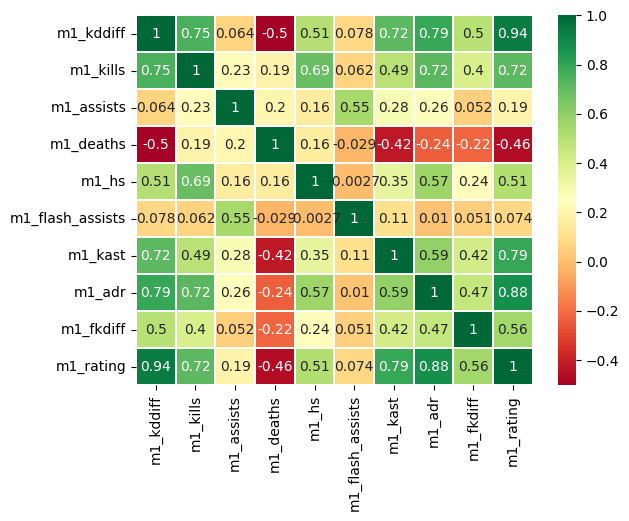

In [14]:
# Lo hacemos con las variables que son de tipo numérica en nuestro dataset y serán utilizadas para el modelo.
columnas_numericas = ['m1_kddiff', 'm1_kills', 'm1_assists', 'm1_deaths', 'm1_hs', 'm1_flash_assists', 'm1_kast', 'm1_adr', 'm1_fkdiff', 'm1_rating']
sns.heatmap(players[columnas_numericas].corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


* La variable m1_deaths influye negativamente en nuestra variable target ya que podemos pensar que es inversamente proporcional, lo contrario a m1_kills, que es directamente proporcional. El valor es mayor para kills ya que se puede eliminar más de un oponente por ronda mientras que solo podemos morir una vez.

* Con respecto a las variables m1_kast, m1_adr, m1_rating vemos que están muy relacionadas con nuestra variable de salida ya que son estadísticas claves de la influencia que tiene el jugador a lo largo de cada mapa.

* m1_hs tiene cierta correlación ya que podemos decir que el jugador que tenga muchos head shots posiblemente matará más de lo que morirá (es el disparo más dificil pero certero a la hora de eliminar un oponente).

* m1_fkdiff tiene un 0.5 de correlación ya que esta variable resta una unidad si el jugador es el primero en morir en la ronda, no pudiendo así hacer una eliminación de un oponente que equipare nuestro target. Si el jugador es quien elimina a un oponente primero en la ronda suma una unidad dando la posibilidad de que aumente su kddiff. Si elimina un oponente más entonces, por consiguiente, conseguirá no restar en su kdiff si es eliminado (+1 first kill, -1 death)

* m1_assists y m1_flash_assists no tiene una correlación clara con nuestro target por lo que podríamos eliminarlas de nuestro dataset.

### Hipótesis sobre los datos

#### Hipótesis 1:
##### Si la variable fkdiff es positiva influirá para que la variable de salida también lo sea. 



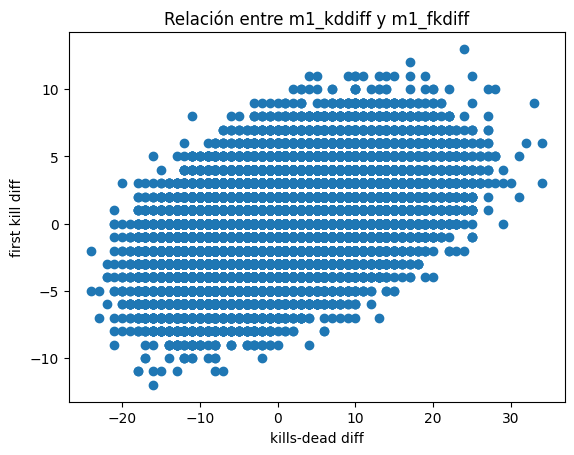

In [15]:
# Seleccionamos las columnas a graficar
x = players['m1_kddiff']
y = players['m1_fkdiff']

plt.xlabel('kills-dead diff')
plt.ylabel('first kill diff')
plt.title('Relación entre m1_kddiff y m1_fkdiff')

plt.scatter(x, y)

plt.show()

* Según la dispersión obtenida en el gráfico, podemos ver que las variables estan relacionadas pero no de forma tan marcada, por lo que la hipotesis se valida parcialmente.

#### Hipótesis 2:
##### Se puede suponer que el jugador con mayor cantidad de ADR tendrá más cantidad de kddiff. 

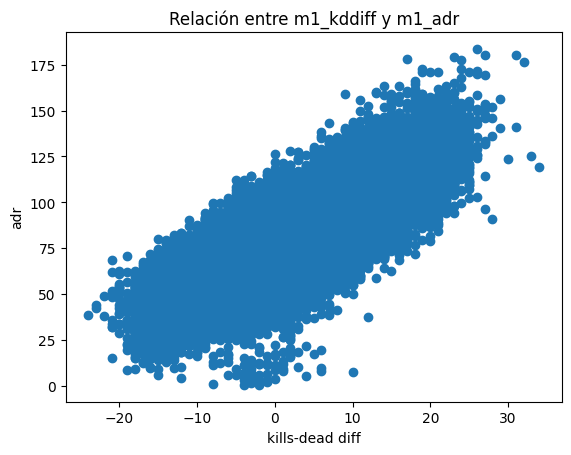

In [16]:
# Seleccionamos las columnas a graficar
x = players['m1_kddiff']
y = players['m1_adr']

plt.xlabel('kills-dead diff')
plt.ylabel('adr')
plt.title('Relación entre m1_kddiff y m1_adr')

plt.scatter(x, y)

plt.show()


* Según la dispersión obtenida en el gráfico, podemos ver que las variables estan casi linealmente relacionadas, por lo que la hipotesis se confirma.

### Hallazgo extra en los datos:


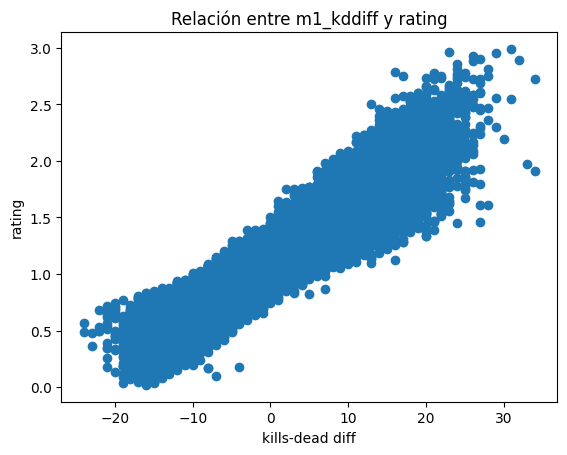

In [17]:
# Seleccionamos las columnas a graficar
x = players['m1_kddiff']
y = players['m1_rating']

plt.xlabel('kills-dead diff')
plt.ylabel('rating')
plt.title('Relación entre m1_kddiff y rating')

plt.scatter(x, y)

plt.show()


* A partir del mapa de calor obtenido en la correlación entre variables (kddiff y rating = 0.94), sumado al gráfico anterior (tendencia lineal), podemos ver que ambas variables se encuentran ampliamente relacionadas.

* Esto se condice con la definición formal de la variable rating, la cual tiene en cuenta una gran cantidad de medidas de performance del jugador a lo largo de la partida, teniendo como resultado que represente una buena medida de rendimiento general.

* Para conocer mas información acerca de esta variable y que estadísticas se tienen en cuenta a la hora de calcularla, se puede consultar el siguiente artículo de un conocido blog de estadisticas: https://www.hltv.org/news/20695/introducing-rating-20